In [108]:
import matplotlib.pyplot as plt
import pylab as pl
import numpy as np
import pandas as pd

In [109]:
df = pd.read_csv("housePrice.csv")
df.head()
display(df.dtypes)
print("total number:", len(df))

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object

total number: 3479


## cleaning Area columns 

In [110]:
df['Area'] = (
    df['Area']
    .astype(str)
    .str.strip()
    .str.replace(',', '', regex = False)
)
df['Area'] = pd.to_numeric(df['Area'], errors='coerce').astype('Int64')
print("max area in before cleaning :", df['Area'].max())
print("len of before:", len(df))

max area in before cleaning : 16160000000
len of before: 3479


In [111]:
df = df[(df['Area'] > 0) & (df['Area'] <= 500)].reset_index(drop=True)
print("max area in after cleaning:", df['Area'].max())
print("len of clean:", len(cdf))

max area in after cleaning: 500
len of clean: 3456


## cleaning address column  

In [112]:
addr = df['Address'].astype('string')
suspect = addr[~addr.str.contains(r'[A-Za-z0-9]', na=False)]
print( "rows with empty/missing value:", len(suspect))
print(suspect.map(repr).head(30))    

rows with empty/missing value: 23
43      <NA>
658     <NA>
702     <NA>
1100    <NA>
1101    <NA>
1567    <NA>
1783    <NA>
2056    <NA>
2057    <NA>
2112    <NA>
2227    <NA>
2321    <NA>
2410    <NA>
2710    <NA>
3005    <NA>
3153    <NA>
3239    <NA>
3272    <NA>
3292    <NA>
3295    <NA>
3332    <NA>
3378    <NA>
3411    <NA>
Name: Address, dtype: object


In [113]:
df = df.dropna(subset=['Address']).reset_index(drop=True)
print(df['Address'].isna().sum())
print(len(df))

0
3433


## make a new copy

In [114]:
clean_df = df.copy()
clean_df.describe()

,Area,Room,Price,Price(USD)
count,3433.0,3433.000000,3.433000e+03,3.433000e+03
mean,104.01806,2.074279,5.212296e+09,1.737432e+05
std,55.595229,0.748359,7.404752e+09,2.468251e+05
min,30.0,0.000000,3.600000e+06,1.200000e+02
25%,68.0,2.000000,1.400000e+09,4.666667e+04
50%,90.0,2.000000,2.850000e+09,9.500000e+04
75%,120.0,2.000000,6.000000e+09,2.000000e+05
max,500.0,5.000000,9.240000e+10,3.080000e+06


## Encoding Address 

In [115]:
len(clean_df['Address'].unique())

191

In [116]:
vc = clean_df['Address'].value_counts()
print(vc.head(10))
print(vc.tail(10))

Address
Punak                     161
Pardis                    146
West Ferdows Boulevard    145
Gheitarieh                139
Shahran                   130
Saadat Abad               129
Parand                    127
Shahr-e-Ziba              109
Southern Janatabad         93
Jeyhoon                    91
Name: count, dtype: int64
Address
SabaShahr             1
Shahrake Madaen       1
Salehabad             1
Enghelab              1
Islamshahr Elahieh    1
Ray - Montazeri       1
Firoozkooh Kuhsar     1
Mehrabad              1
Kazemabad             1
Yakhchiabad           1
Name: count, dtype: int64


In [117]:
threshold = 30
top_addrs = vc[vc >= threshold].index
print(len(top_addrs))

28


In [118]:
clean_df['Address_g']=np.where(
    clean_df['Address'].isin(top_addrs),
    clean_df['Address'],
    'Others'
)
print(clean_df['Address_g'].value_counts())
print(clean_df['Address_g'].unique())

Address_g
Others                       1069
Punak                         161
Pardis                        146
West Ferdows Boulevard        145
Gheitarieh                    139
Shahran                       130
Saadat Abad                   129
Parand                        127
Shahr-e-Ziba                  109
Southern Janatabad             93
Jeyhoon                        91
Central Janatabad              90
Persian Gulf Martyrs Lake      88
Andisheh                       83
Ostad Moein                    82
East Ferdows Boulevard         74
Shahrake Qods                  69
Niavaran                       68
Pasdaran                       66
Pirouzi                        63
Salsabil                       60
Shahrake Gharb                 59
Farmanieh                      57
Heravi                         46
Ekhtiarieh                     41
Islamshahr                     39
Feiz Garden                    38
Yousef Abad                    38
Northern Janatabad             33
Name

In [120]:
num_features = ['Area','Room','Parking','Warehouse','Elevator']
X_num = clean_df[features].astype(float)
X_addr = pd.get_dummies(
    clean_df['Address_g'],
    prefix='addr',
    drop_first=True,
)
X_encoded = pd.concat([X_num, X_addr], axis=1)
y = clean_df['Price']
print(X_encoded.shape)
print(X_encoded.dtypes.unique())    

(3433, 33)
[dtype('float64') dtype('bool')]


In [121]:
X_model = X_encoded.astype(float).copy()
print(X_model.dtypes.unique()) 

[dtype('float64')]


## Drawing histograms 

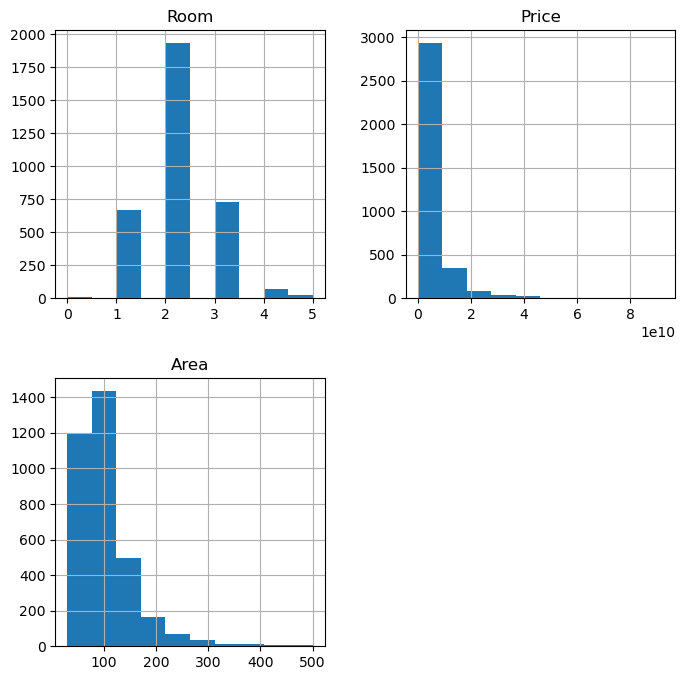

In [122]:
viz = clean_df[['Room','Price','Area','Address']]
viz.hist(figsize=(8,8))
plt.show()

## Making plot

(0.0, 600.0)

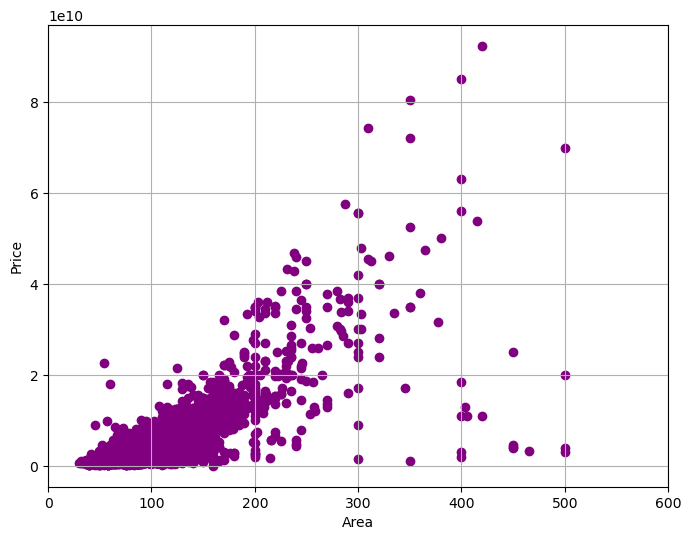

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(clean_df['Area'], clean_df['Price'], color='purple')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.xlim(0,600)

## Spilt dataset

In [126]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_model,
    y,
    test_size = 0.20,
    random_state=42,
)
print(X_train.shape)
print(X_test.shape)

(2746, 33)
(687, 33)


## modelling 

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("R2: ", r2_score(y_test,y_predict))
print("RMSE: ", root_mean_squared_error(y_test,y_predict))

R2:  0.6932588233063625
RMSE:  3732704082.5816703
